In [84]:
import plotly.express as plx
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

In [85]:
DATA_PATH = "../data/input"
OUTPUT_PATH = "../outputs"

# Datasets

In [86]:
df_data = pd.read_csv(os.path.join(DATA_PATH, 'internship_data_matrix.csv'))
df_data.head(10)

,sample,FT-000,FT-001,FT-002,FT-003,FT-004,FT-005,FT-006,FT-007,FT-008,...,FT-242,FT-243,FT-244,FT-245,FT-246,FT-247,FT-248,FT-249,FT-250,FT-251
0,20241106-297-Blank1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20241106-297-Blank2,0.000000,0.000000,0.000000,5.770641,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.534493,0.000000,0.000000,0.000000
2,20241106-297-Blank3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.469501,0.000000,0.000000,0.000000
3,20241106-297-Blank4,0.000000,5.497865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,20241106-297-Blank5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,20241106-297-Blank6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,20241106-297-Diluted-QC1,1399.030351,2234.397837,2081.843031,3686.431339,7044.317405,40721.275363,20486.257971,1975.067689,6314.770037,...,65.429736,58.502252,641.535776,25.217837,0.000000,1587.339497,401.598503,26.081734,428.331105,63.870424
7,20241106-297-Diluted-QC2,1421.659554,2165.493736,2119.732010,3640.815214,7498.426630,41381.014453,21337.444716,2119.686893,6591.908929,...,75.803912,58.304733,757.692671,37.094034,0.000000,1762.655206,486.387939,32.405865,600.518429,0.000000
8,20241106-297-Diluted-QC3,1490.939447,2167.935040,559.809742,3716.471966,1839.149062,13089.714518,5693.504282,2069.800942,6716.728979,...,93.907909,90.051001,709.895566,63.108046,2.357303,2093.661027,470.599689,37.258958,481.160995,0.000000
9,20241106-297-Diluted-QC4,1546.950461,2057.856971,1770.333817,3231.122644,6340.197841,35954.845791,17957.282926,1898.047196,6358.421614,...,60.812886,110.968761,844.435996,74.010468,6.683485,1593.938447,565.760844,45.158254,605.402780,8.273432


In [87]:
df_feature_meta = pd.read_csv(os.path.join(DATA_PATH, 'internship_feature_metadata.csv'))
df_feature_meta.head()

,feature,mz,mz max,mz min,mz std,rt,rt end,rt max,rt min,rt start,rt std
0,FT-000,359.108768,359.130591,359.090122,0.010955,543.846374,561.270879,546.697803,539.941156,528.714227,1.683901
1,FT-001,357.109546,357.130018,357.091871,0.010668,543.839157,563.021530,546.948017,540.038924,528.530311,1.662290
2,FT-002,889.649931,889.702216,889.601547,0.025552,609.099742,627.717251,611.746501,606.426553,596.789046,1.324647
3,FT-003,355.111928,355.132772,355.093653,0.010508,543.995269,566.951285,547.164503,540.681882,526.943213,1.609071
4,FT-004,888.645365,888.696941,888.600202,0.026161,609.255652,632.996442,612.008732,606.778809,595.461688,1.254684


In [88]:
df_acq = pd.read_csv(os.path.join(DATA_PATH, 'internship_acquisition_list.csv'))
df_acq.head()

,sample,class,id,order,batch
0,20241106-297-Blank1,B,20241106-297-Blank1,1,1
1,20241106-297-Blank2,B,20241106-297-Blank2,2,1
2,20241106-297-Blank3,B,20241106-297-Blank3,3,1
3,20241106-297-Blank4,B,20241106-297-Blank4,102,1
4,20241106-297-Blank5,B,20241106-297-Blank5,103,1


In [89]:
# Match samples with corresponding pool QC for median normalization correction later on

def subbatch(x):
    if x['order'] <= 14 :
        return 0
    if x['order'] <= 26 :
        return 1
    if x['order'] <= 38 :
        return 2
    if x['order'] <= 50 :
        return 3
    if x['order'] <= 62 :
        return 4
    if x['order'] <= 74 :
        return 5
    if x['order'] <= 86 :
        return 6
    if x['order'] <= 101 :
        return 7
    else:
        return 8

df_acq['sub_batch'] = df_acq.apply(lambda x : subbatch(x), axis=1) 

In [90]:
df_ex_std = pd.read_csv(os.path.join(DATA_PATH, 'exogenous_standards.csv'))
df_ex_std

,compound_id,mz,Retention_time
0,GU4,886.40,610
1,GU5,1048.45,753
2,GU14,1253.96,1500
3,GU15,1334.99,1551


In [91]:
# Augment dataset

df_data = df_data.merge(df_acq[['sample', 'class', 'order', 'batch', 'sub_batch']], on='sample')
df_data_melt = df_data.melt(id_vars=['sample', 'class', 'order', 'batch', 'sub_batch'],value_name='intensity', var_name='feature')
df_data_melt['feature_number'] = df_data_melt['feature'].apply(lambda s : int(s.split('-')[1]))

# First exploration

## Samples, batch, classes and run order

In [92]:
print(f"There are {df_acq['sample'].nunique()} samples")

There are 124 samples


In [93]:
print("Sample classes and frequency are :")
df_acq['class'].value_counts()

Sample classes and frequency are :


class
Dunn      27
LMU       26
French    26
QC        22
B         11
dQC       10
SS         2
Name: count, dtype: int64

In [94]:
print("There are only 2 batches with samples in batch 1 only")
print("Let's print quality check injection order")
df_acq[df_acq['class'] == 'QC'].sort_values(by='order')

There are only 2 batches with samples in batch 1 only
Let's print quality check injection order


,sample,class,id,order,batch,sub_batch
91,20241106-297-QC1,QC,20241106-297-QC1,12,1,0
94,20241106-297-QC2,QC,20241106-297-QC2,13,1,0
95,20241106-297-QC3,QC,20241106-297-QC3,14,1,0
96,20241106-297-QC4,QC,20241106-297-QC4,26,1,1
97,20241106-297-QC5,QC,20241106-297-QC5,38,1,2
98,20241106-297-QC6,QC,20241106-297-QC6,50,1,3
99,20241106-297-QC7,QC,20241106-297-QC7,62,1,4
100,20241106-297-QC8,QC,20241106-297-QC8,74,1,5
101,20241106-297-QC9,QC,20241106-297-QC9,86,1,6
92,20241106-297-QC10,QC,20241106-297-QC10,100,1,7


## Samples and features
* How many features
* How many samples
* NaN values ?

In [95]:
feats_col = set(df_data.columns)-set(['sample', 'class', 'order', 'batch', 'sub_batch'])
print(f"{len(feats_col)} features were detected")

252 features were detected


In [96]:
print("There are no missing entries in the dataset")
df_data[df_data.isna().any(axis=1)]

There are no missing entries in the dataset


,sample,FT-000,FT-001,FT-002,FT-003,FT-004,FT-005,FT-006,FT-007,FT-008,...,FT-246,FT-247,FT-248,FT-249,FT-250,FT-251,class,order,batch,sub_batch


# Analysis

### 1.a - How many features were detected and what is the features distribution across m/z and RT ?

The features considered are the chromatographic peaks detected for a given retention time range at a given mass / charge ratio range. A feature value is the peak intensity integrated over the considered time range.
Assuming that features have already been found optimally, 252 features have been detected.

In [97]:
# For easier plotting
df_feature_meta['feature_number'] = df_feature_meta['feature'].apply(lambda x : int(x.split('-')[1]))

To get a rapid visual sense of a given feature mass charge ratio and retention time :

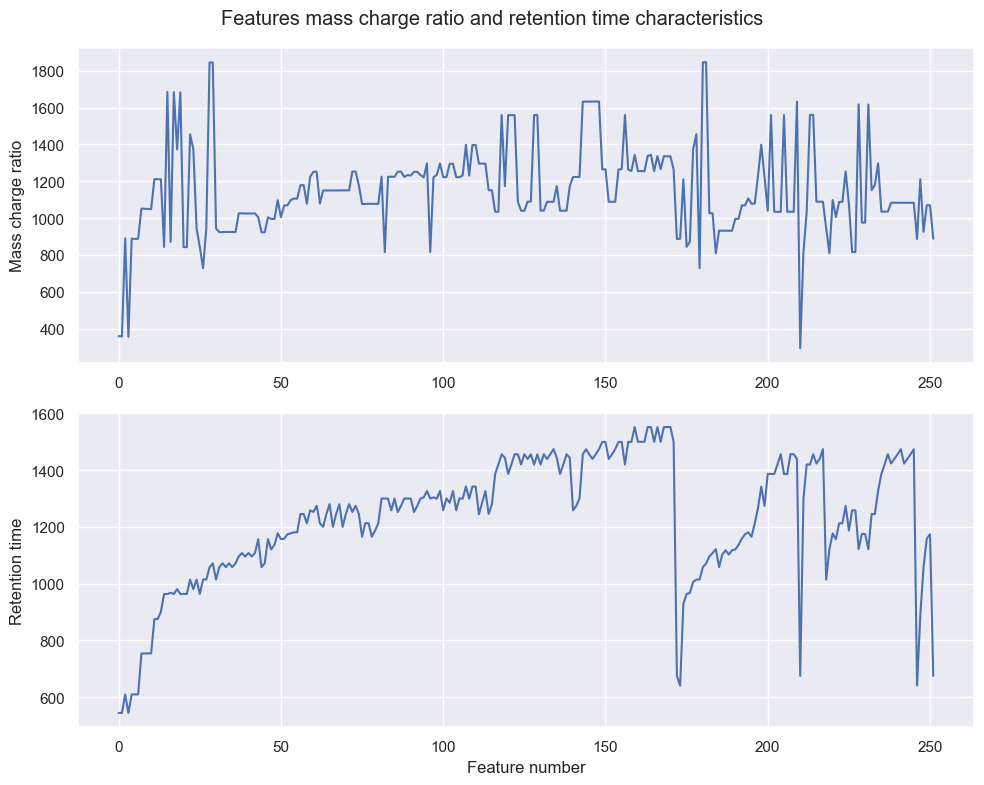

In [98]:
fig, axs = plt.subplots(nrows=2, sharex=False, figsize=(10,8))
axs[0].plot(df_feature_meta['feature_number'], df_feature_meta['mz'])
axs[0].set_ylabel('Mass charge ratio')
axs[1].plot(df_feature_meta['feature_number'], df_feature_meta['rt'])
axs[1].set_ylabel('Retention time')
axs[1].set_xlabel('Feature number')
plt.suptitle('Features mass charge ratio and retention time characteristics')
plt.tight_layout()
plt.show()

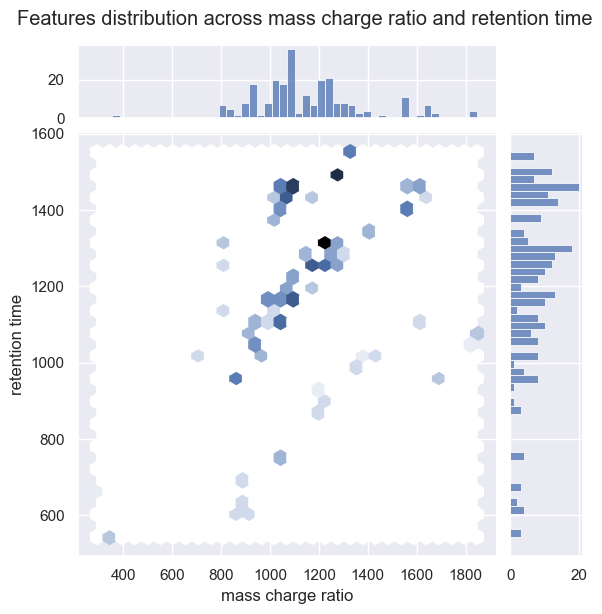

In [99]:
plot =sns.jointplot(x=df_feature_meta.rename(columns={'mz': 'mass charge ratio'})['mass charge ratio'],\
                    y = df_feature_meta.rename(columns={'rt': 'retention time'})['retention time'], kind='hex',\
                    marginal_kws=dict(bins=50), marginal_ticks=True, joint_kws=dict(gridsize=30))
plt.suptitle('Features distribution across mass charge ratio and retention time', y=1.02)
plt.savefig(os.path.join(OUTPUT_PATH, 'features_mz_rt.png'))
plt.show()

In [100]:
df_feature_meta[['mz', 'rt']].describe(percentiles = [.1,.25,.5,.75,.9])

,mz,rt
count,252.000000,252.000000
mean,1148.883784,1225.810779
std,242.652646,223.363360
min,293.183141,543.839157
10%,887.747036,963.102571
25%,1026.193175,1107.186071
50%,1089.360559,1257.883210
75%,1253.561990,1419.468573
90%,1558.997340,1471.395049
max,1846.271291,1551.421331


80% of all features have a mass to charge ratio between 887.75 and 1559. 80% of all features have a retention time between 963.10 and 1471.4. 

This can be easily visualized on the joint density plot above.

### 1.b - How is the feature intensity distribution across classes ?

In [101]:
corr_mat = df_data.drop(['sample', 'class', 'order', 'batch', 'sub_batch'], axis=1).corr()
corr_feats = []
feats_list = corr_mat.columns
thresh = 0.8

for i in range(corr_mat.shape[0]):
    for j in range(i, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] > thresh:
            corr_feats.append(feats_list[i])
corr_feats = set(corr_feats)
print(len(corr_feats))

252


All features are correlated. 

In [102]:
summary = df_data.drop(['sample', 'class', 'order', 'batch', 'sub_batch'], axis=1)\
                 .describe().T.reset_index(names='feature')
summary.sort_values(by='50%')

,feature,count,mean,std,min,25%,50%,75%,max
251,FT-251,124.0,18.892990,30.104685,0.0,0.000000,0.000000,28.720251,106.548827
174,FT-174,124.0,36.488393,53.545819,0.0,0.000000,7.605016,68.722024,284.512362
172,FT-172,124.0,72.908623,119.691484,0.0,0.000000,10.582890,128.296711,621.157232
215,FT-215,124.0,27.909818,19.733551,0.0,11.322193,27.754493,42.844679,99.942765
79,FT-079,124.0,60.205106,88.367856,0.0,12.739702,52.632901,81.488766,848.168217
...,...,...,...,...,...,...,...,...,...
10,FT-010,124.0,23436.979986,13059.588068,0.0,22642.203530,28972.029997,32108.694714,37878.353716
142,FT-142,124.0,23940.565772,13595.312216,0.0,24197.415652,30412.315270,32845.632119,40967.389005
5,FT-005,124.0,25167.289931,15402.773802,0.0,15076.027246,30642.503795,35819.855961,49640.208086
105,FT-105,124.0,32207.198677,18320.449383,0.0,33218.057924,39908.131176,43322.703214,54555.522451


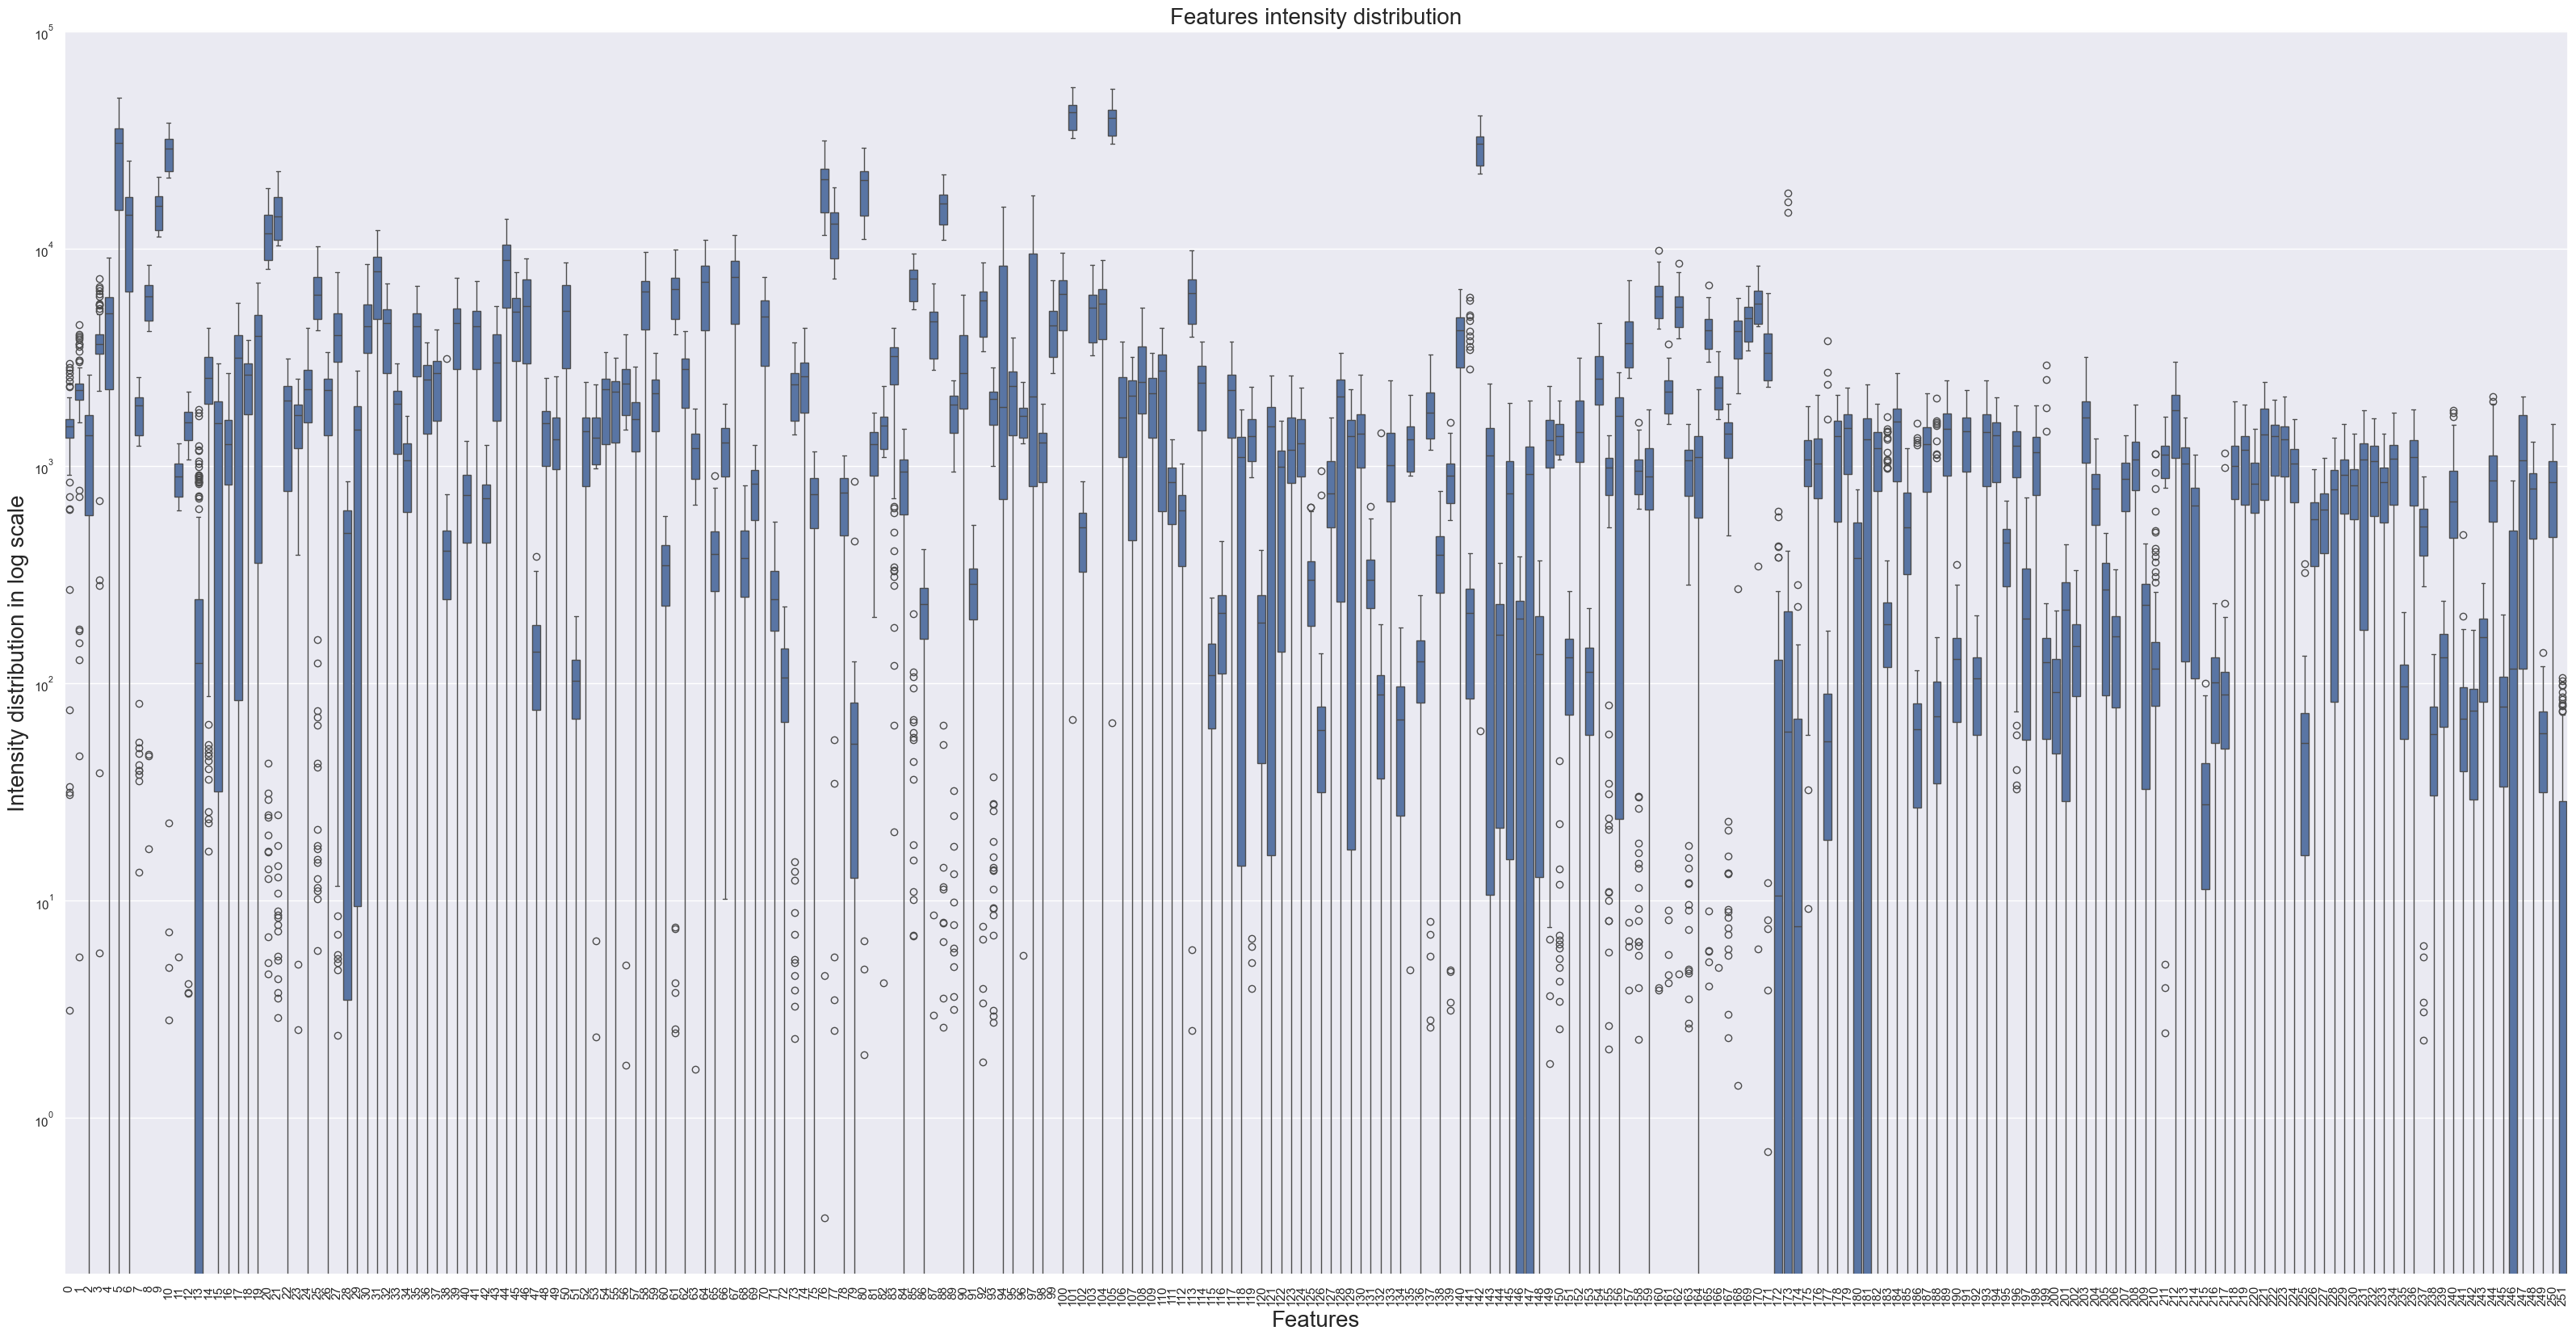

In [103]:
sns.set(rc = {'figure.figsize':(40, 20)})
fig = sns.boxplot(data = df_data_melt,\
                   x='feature_number', y='intensity')#, palette = 'Set2')
fig.set(yscale='log')
fig.axes.set_title('Features intensity distribution',fontsize=20)
fig.set_xlabel("Features",fontsize=20)
fig.set_ylabel("Intensity distribution in log scale",fontsize=20)
plt.xticks(rotation=90)
plt.show()

From a qualitative look, features median intensity span on 5 orders of magnitude, with most features ranging in the 1E2 - 1E4 intensity scale yet with visually distinct distributions.

In [104]:
df_data_melt['log_intensity'] = df_data_melt['intensity']\
                                .apply(lambda x : 0 if x < 1E-3 else np.log10(x))

In [105]:
df_data_melt[(df_data_melt['class'].isin(['B']))].groupby('feature')['intensity'].describe([.1, .25,.5,.75,.95]).sort_values(by='50%')

,count,mean,std,min,10%,25%,50%,75%,95%,max
feature,,,,,,,,,,
FT-000,11.0,9.013785,14.811896,0.0,0.0,0.0,0.0,16.950225,32.625591,33.616316
FT-001,11.0,48.332744,73.934548,0.0,0.0,0.0,0.0,87.488563,175.592595,176.867087
FT-002,11.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
FT-003,11.0,56.964631,116.384416,0.0,0.0,0.0,0.0,22.232979,291.072493,300.318172
FT-004,11.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
FT-247,11.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
FT-248,11.0,0.909454,2.127179,0.0,0.0,0.0,0.0,0.000000,5.001997,6.469501
FT-249,11.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


For blank samples, the median intensity for all features is 0. Such samples shouldn't contain any metabolite of interest, and if they exhibit a peak of significant intensity consistently over batches, it suggests there is contamination.

In [106]:
df_data_melt[(df_data_melt['class'].isin(['SS']))].groupby('batch')['intensity'].describe([.87,.9, .95, .99])

,count,mean,std,min,50%,87%,90%,95%,99%,max
batch,,,,,,,,,,
1,252.0,959.140234,4480.824398,0.0,0.0,1249.466645,2035.505296,4560.523132,22621.114039,49640.208086
2,252.0,50.471917,481.792446,0.0,0.0,0.000000,0.000000,2.064085,1326.722329,6039.383279


12% of all features in batch 1 for System Suitability samples exhibit intensities betweeb 1250 and 49'640, whereas only 1% of features in batch 2 have intensities above 1326. This suggests a difference in SS sample molecular composition between batches. 

In [107]:
samples_summ = df_data_melt.loc[df_data_melt['class'].isin(['Dunn', 'LMU', 'French'])].groupby(['class','feature'])['intensity'].describe()
samples_summ.reset_index().groupby('class')['50%'].describe([.37, .6,.7,.75,.8,.9,.95,.99])

,count,mean,std,min,37%,50%,60%,70%,75%,80%,90%,95%,99%,max
class,,,,,,,,,,,,,,
Dunn,252.0,3201.038668,5936.912806,0.000000,1027.411259,1464.139206,1787.083070,2483.202598,3042.790394,3874.263681,6342.734793,12662.466543,31745.984216,45028.917303
French,252.0,3043.442251,5736.235071,30.358212,963.985818,1327.192789,1689.266918,2405.014687,2741.839279,3736.821624,6368.253232,10320.562001,31755.524569,42776.164600
LMU,252.0,2939.217986,5827.177137,0.000000,1032.900703,1333.466178,1677.013997,2198.962053,2487.198946,3529.701180,5964.892584,9928.936070,33499.985020,45203.841036


Less than 5 % of features for each class have a median intensity value above 10'000 and less than 5% have a median intensity value below 100. 52% (95 - 37) of features for each class have a median intensity between 1'000 and 10'000. 

In [108]:
samples_summ = df_data_melt.loc[df_data_melt['class'].isin(['QC', 'dQC'])].groupby(['class','feature'])['intensity'].describe()
samples_summ.reset_index().groupby('class')['50%'].describe([.37, .6,.7,.75,.77,.8,.9,.95,.99])

,count,mean,std,min,37%,50%,60%,70%,75%,77%,80%,90%,95%,99%,max
class,,,,,,,,,,,,,,,
QC,252.0,1124.666564,2354.055659,0.0,242.612700,449.132719,584.026462,843.286888,977.608615,1065.720368,1482.357767,2396.441202,3860.093395,12065.232831,19627.458890
dQC,252.0,1025.124209,2061.120462,0.0,316.574215,432.785522,572.708085,781.730919,965.451336,1103.292332,1229.546337,2170.345966,3389.707651,12968.905611,16146.002594


Quality checks features intensity distributions span on similar scale as the samples' distributions, yet less than 13% (90% - 77%) of features have a median value between 1'000 and 10'000, and 77% of features have a median intensity below 1'100. 

### 2.a - Contamination

Contamination can be assessed using blank samples. 
First of all, if blank samples exhibit significant peaks consistently across batches, then it might highlight a contaminant.
To check peak significant, we will compare blank samples peak intensity between batches. 

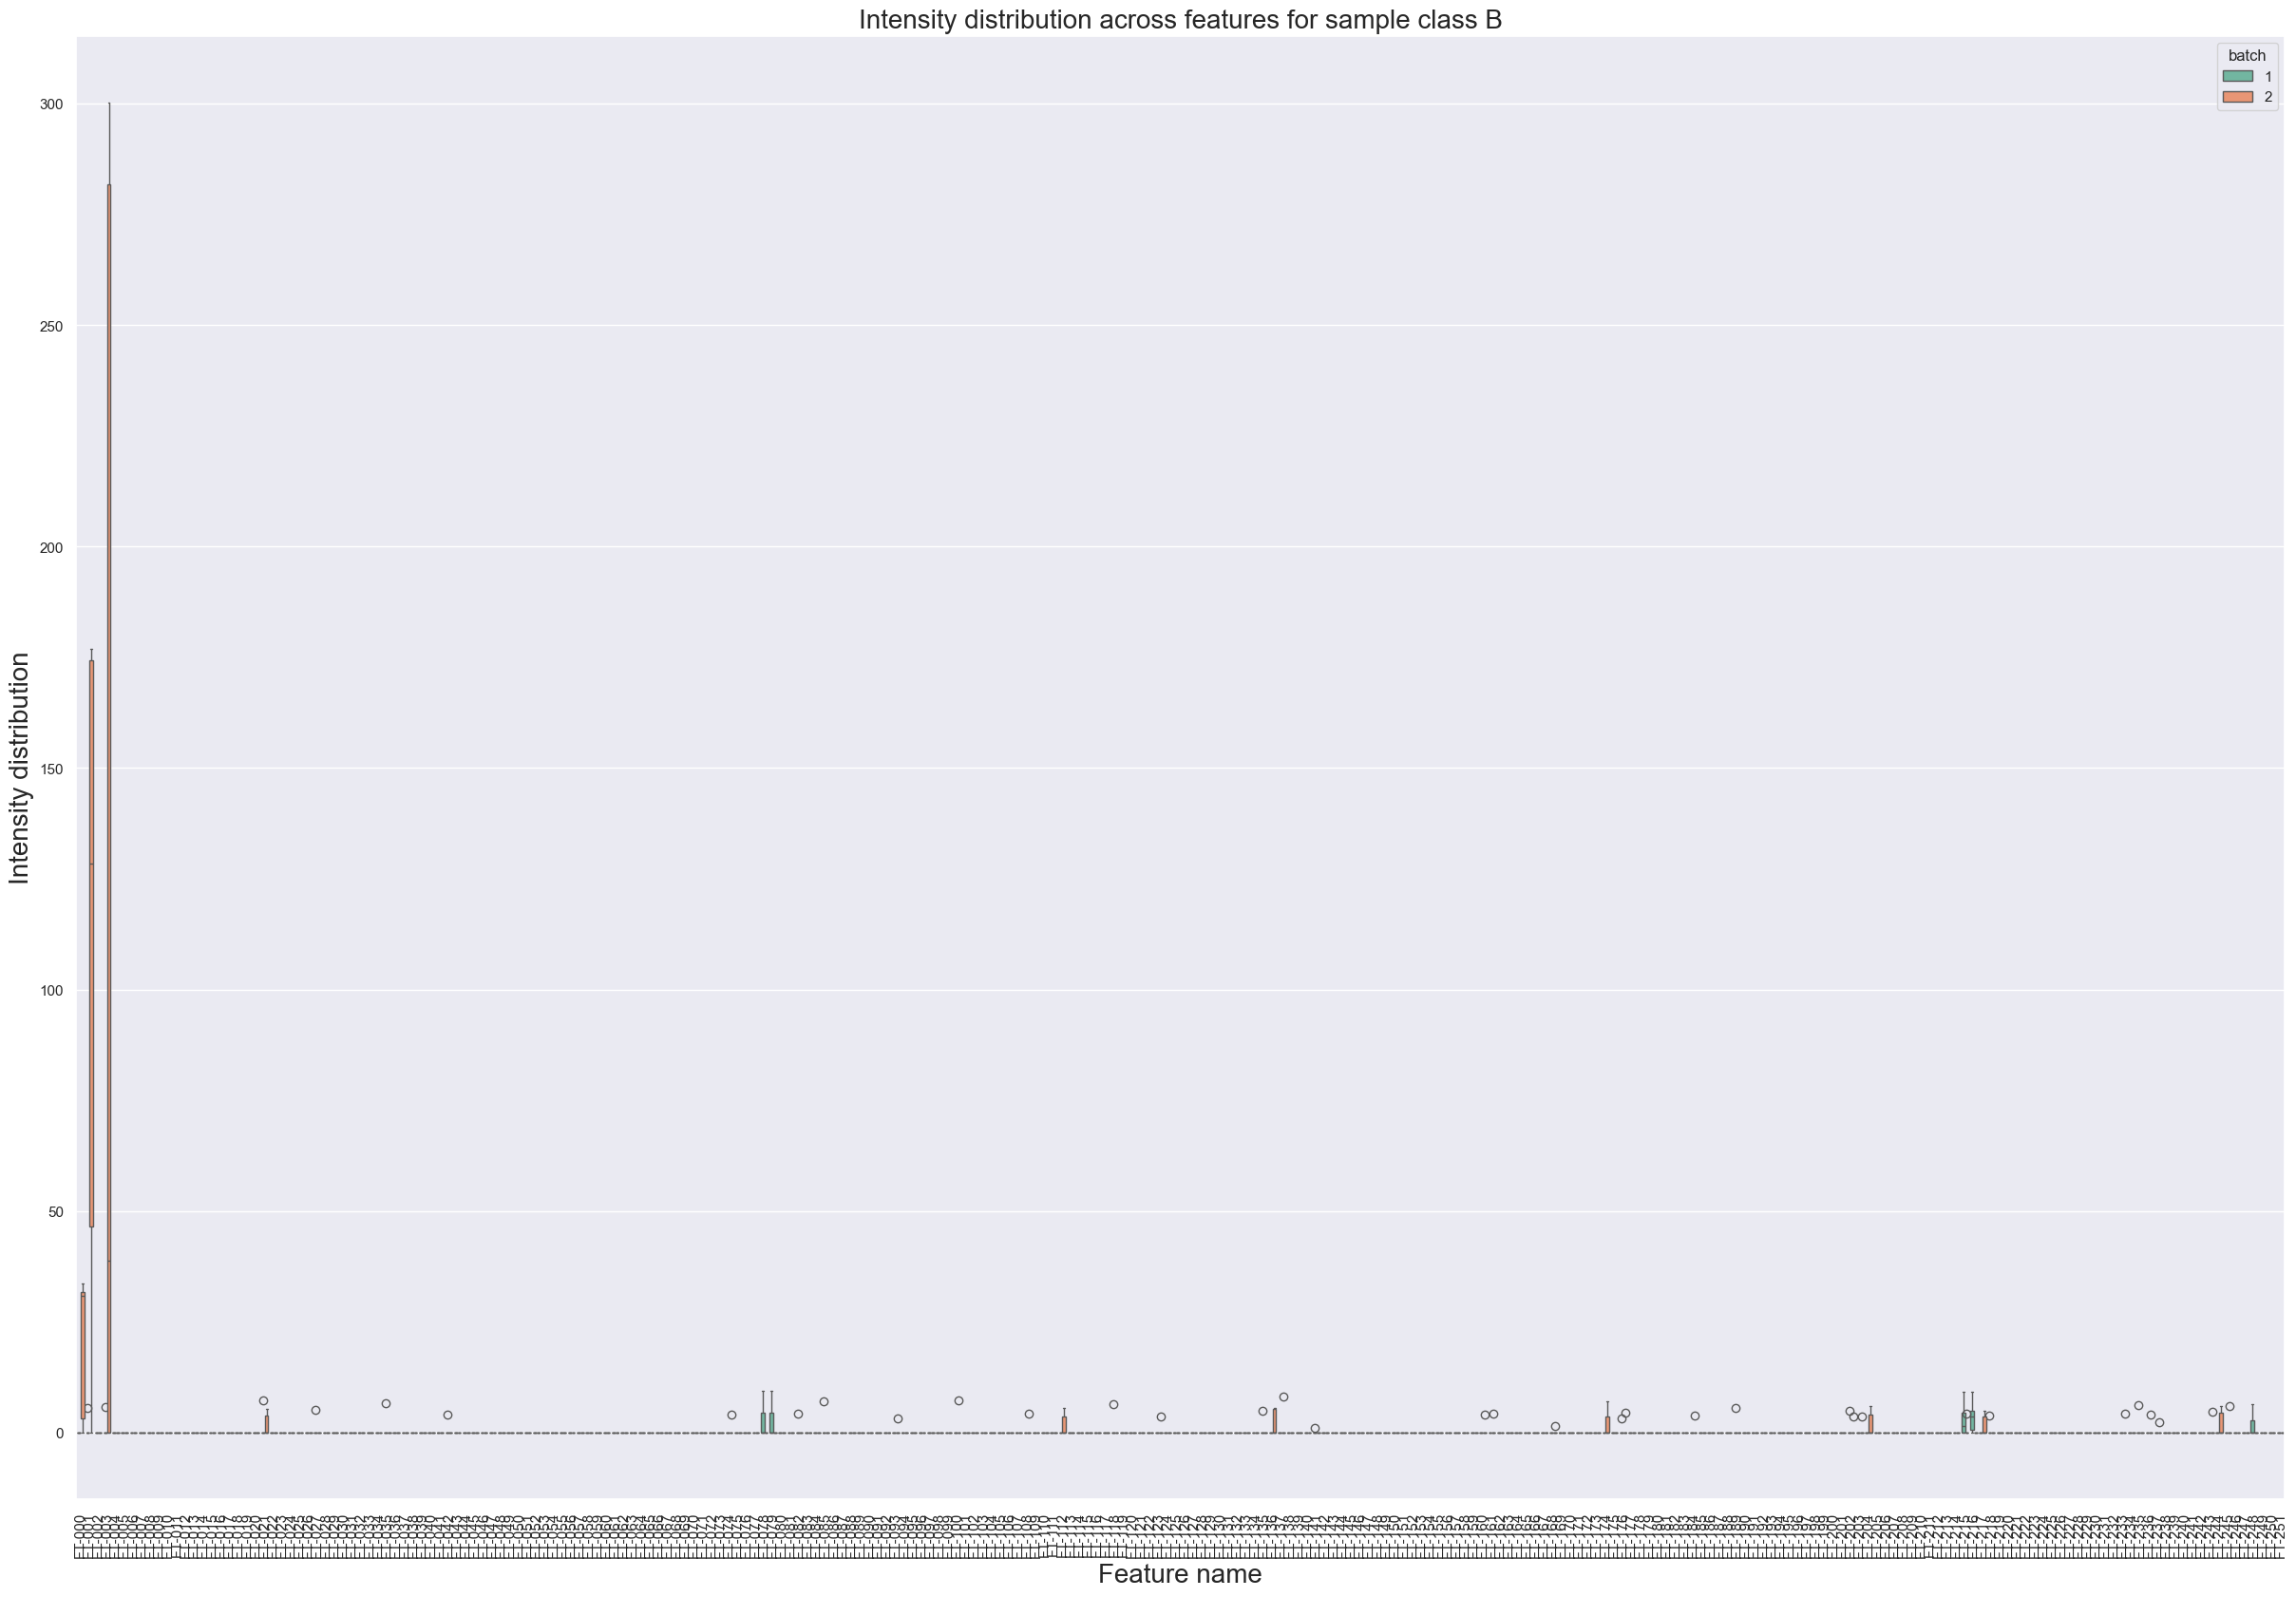

In [109]:
sns.set(rc = {'figure.figsize':(30, 20)})
fig = sns.boxplot(data = df_data_melt.loc[df_data_melt['class'] == 'B'],\
                   x='feature', y='intensity',hue='batch', palette = 'Set2')
fig.axes.set_title('Intensity distribution across features for sample class B',fontsize=20)
fig.set_xlabel("Feature name",fontsize=20)
fig.set_ylabel("Intensity distribution",fontsize=20)
#fig.set(yscale='log')
plt.xticks(rotation=90)
plt.show()

Batches peaks heights are negligible compared to actual samples peaks heights. So we can assess that there is no contamination. 

### 3.a - Compute Coefficients of Variations for features in QC samples

In untargeted metabolomics, the relationship between measured analyte (peak area) and actual concentration is often nonlinear and thus a Gaussian error in actual metabolite concentration will not translate to a Gaussian error in measured value. In which case, it may be preferable to calculate the nonparametric statistical equivalent to standard deviation, median absolute deviation (MAD). 
[Guidelines and considerations for the use of system suitability and quality control samples in mass spectrometry assays applied in untargeted clinical metabolomic studies](https://link.springer.com/article/10.1007/s11306-018-1367-3#Sec6)


In [110]:
from scipy.stats import median_abs_deviation as mad

In [111]:
cv_classwise = df_data_melt[df_data_melt['class'].isin(['QC', 'dQC', 'Dunn', 'French', 'LMU']) & (df_data_melt['batch'] == 1)][['class', 'feature', 'intensity']]\
                            .groupby(['class', 'feature'])\
                            .agg(lambda x : 1.4826 * mad(x) / x.median()).reset_index()\
                            .rename(columns={'intensity' : 'CV%'})
cv_classwise.groupby('class').describe()

CV%                                                              \
        count      mean       std       min       25%       50%       75%   
class                                                                       
Dunn    251.0  0.212712  0.147200  0.048848  0.151410  0.188174  0.225092   
French  252.0  0.171378  0.133541  0.057947  0.110646  0.138283  0.189349   
LMU     249.0  0.216501  0.167088  0.070364  0.159011  0.184929  0.214796   
QC      252.0  0.226127  0.169424  0.025969  0.141244  0.190521  0.257509   
dQC     251.0  0.230408  0.187722  0.007062  0.128175  0.208371  0.280337   

                  
             max  
class             
Dunn    1.482600  
French  1.369084  
LMU     1.482600  
QC      1.374284  
dQC     1.482600

We observe that 50% of features have a CV below 20%, and more than 75% below 30%.

### 3.b - Are the standards detected consistently across the experiment ?

As we have only two SS samples, we should first select features which exhibit a high intensity and we compare these features to the exogenous standards.
Then, to check consistency of standards detection in SS samples, we should filter features which exhibit a CV smaller than 40% and compare them to the exogenous standards features. 


In [112]:
print("Exogenous standard we want to detect")
df_ex_std

Exogenous standard we want to detect


,compound_id,mz,Retention_time
0,GU4,886.40,610
1,GU5,1048.45,753
2,GU14,1253.96,1500
3,GU15,1334.99,1551


In [113]:
closest_feats = dict()
for i, c in df_ex_std.iterrows():
    df_feature_meta['c_dist'] = np.sqrt((df_feature_meta['mz'] - c['mz'])**2 + (df_feature_meta['rt'] - c['Retention_time'])**2 )
    closest_feats[c['compound_id']] = df_feature_meta['feature'].iloc[df_feature_meta['c_dist'].idxmin()]

print("These are the closest features to the exogenous compounds, in term of mz and rt :")
print(closest_feats)

These are the closest features to the exogenous compounds, in term of mz and rt :
{'GU4': 'FT-005', 'GU5': 'FT-010', 'GU14': 'FT-162', 'GU15': 'FT-169'}


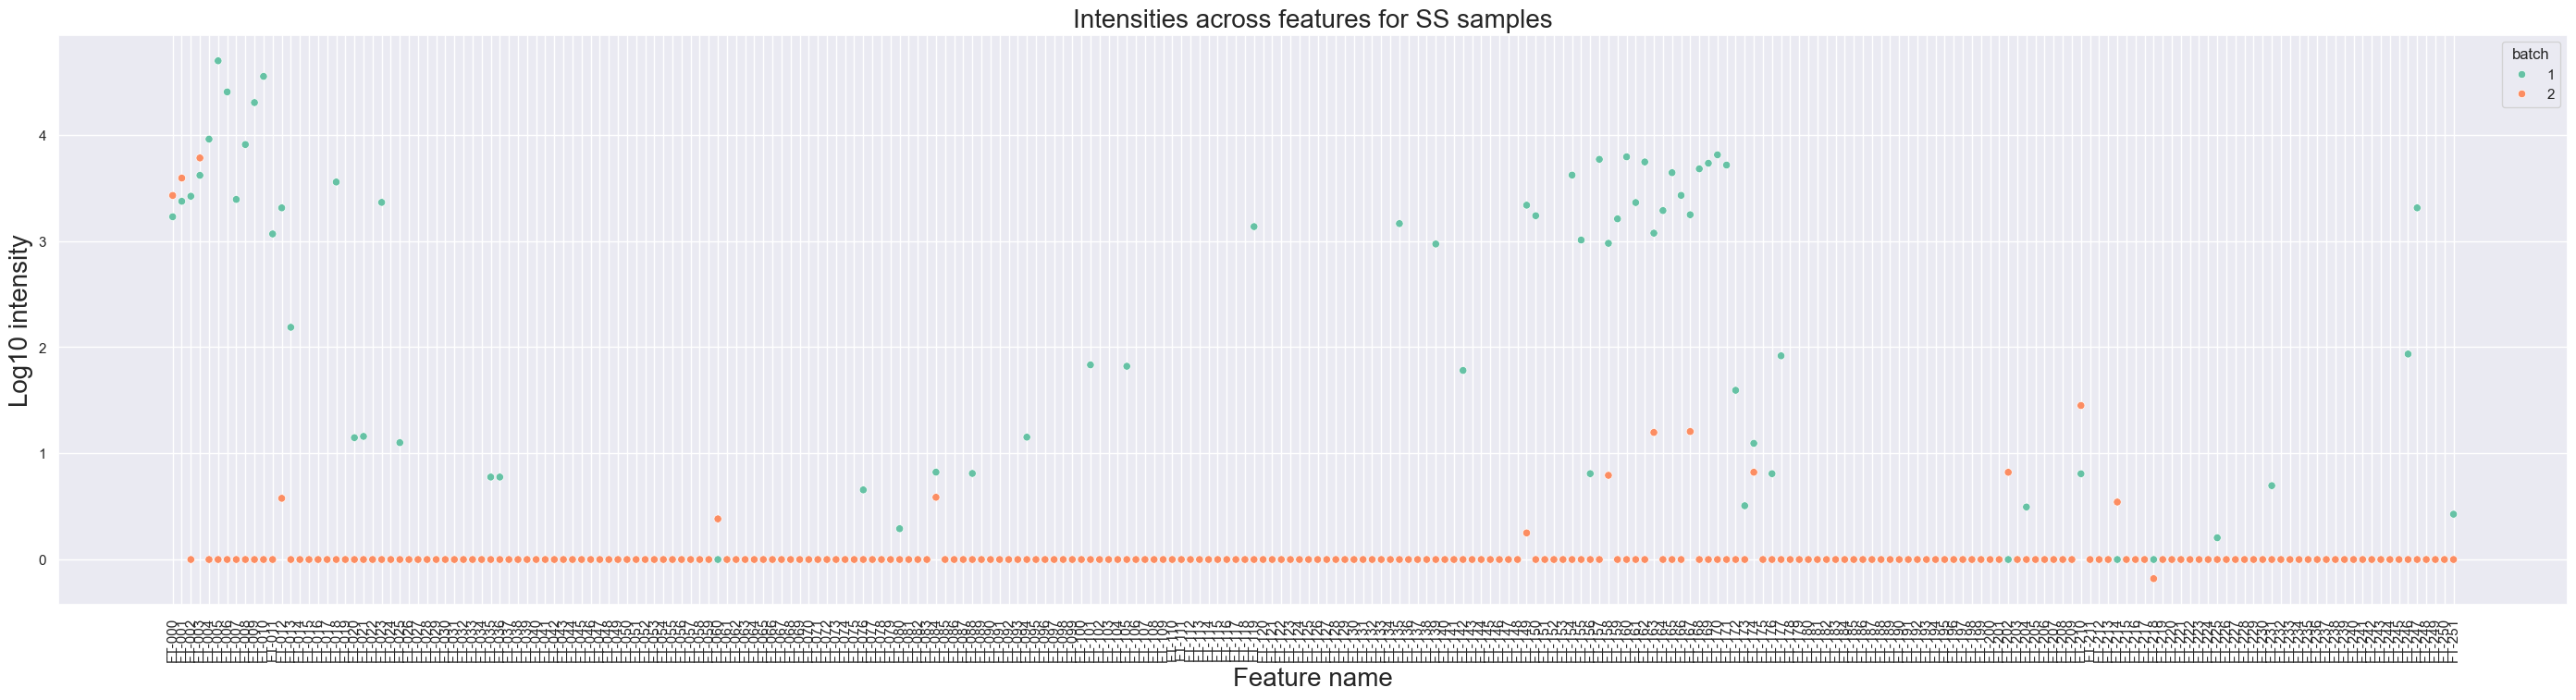

In [114]:
sns.set(rc = {'figure.figsize':(35, 8)})
fig = sns.scatterplot(data = df_data_melt.loc[df_data_melt['class'] == 'SS'],\
                   x='feature', y='log_intensity',hue='batch', palette = 'Set2')
fig.axes.set_title('Intensities across features for SS samples',fontsize=20)
fig.set_xlabel("Feature name",fontsize=20)
fig.set_ylabel("Log10 intensity",fontsize=20)
#fig.set(yscale='log')
plt.xticks(rotation=90)
plt.show()

From visual inspection, we can fix a threshold for detected features at 500 or 1000.

In [115]:
high_intensity_feats = df_data_melt.loc[(df_data_melt['class'] == 'SS') & (df_data_melt['intensity'] >= 5*1E2)]['feature']
high_intensity_feats_meta = df_feature_meta[(df_feature_meta['feature'].isin(high_intensity_feats))]

In [116]:
high_intensity_feats_meta[high_intensity_feats_meta['feature'].isin(closest_feats.values())]

,feature,mz,mz max,mz min,mz std,rt,rt end,rt max,rt min,rt start,rt std,feature_number,c_dist
5,FT-005,886.632460,886.683375,886.580667,0.026029,609.461289,638.067164,612.067644,606.711878,593.375215,1.287131,5,1042.842091
10,FT-010,1048.724800,1048.785954,1048.669876,0.030825,753.824614,789.134640,756.436012,751.049814,736.919631,1.286855,10,847.016151
162,FT-162,1254.277029,1254.349588,1254.211046,0.036267,1499.404825,1520.664302,1501.897377,1496.650283,1481.805204,1.265325,162,95.794811
169,FT-169,1335.323637,1335.400775,1335.251201,0.039461,1551.257112,1571.193499,1553.935840,1548.495745,1537.579330,1.327435,169,0.421213


Features 5, 10, 162 and 169 are closest in terms of euclidean distance to exogenous compounds of interest. These features have been successfully detected with a high intensity for the first SS sample, therefore standards have been successfully detected in the first phase of the experiment.


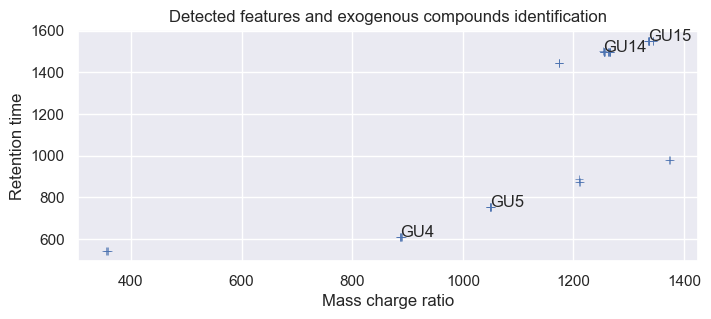

In [117]:
sns.set(rc = {'figure.figsize':(8, 3)})
df_plot = high_intensity_feats_meta[['feature', 'mz', 'rt']]
df_plot = pd.concat([df_plot, df_ex_std.rename(columns={'compound_id':'feature', 'Retention_time':'rt'})])
fig = sns.scatterplot(df_plot, x='mz', y='rt', marker='+')
plt.title('Detected features and exogenous compounds identification')
# Set x-axis label
plt.xlabel('Mass charge ratio')
# Set y-axis label
plt.ylabel('Retention time')

for i, point in df_plot.iterrows():
    if not 'FT' in point['feature']:
        fig.text(point['mz']+.02, point['rt'], str(point['feature']))
plt.savefig(os.path.join(OUTPUT_PATH, 'detected_compounds.png'))

Another way to assess exogenous standard detection : plot detected features by their mass/charge and retention time along with the exogenous compounds and see whether they cluster.

### 4.a - How is the distribution of intensities across classes ?


In [118]:
df_data_melt[['class', 'log_intensity']].groupby('class').agg(lambda x : np.count_nonzero(x) / x.size * 100)

,log_intensity
class,
B,2.633478
Dunn,99.368019
French,99.801587
LMU,98.565324
QC,64.375902
SS,15.674603
dQC,63.968254


I observe that more than 2.63 % recorded features intensity for blank samples are non-zero, which is expected from previous plots. This percentage amounts to 15.67% for SS samples.

We will compare QC and samples intensity distribution for batch 1 only, as we notice that quality check intensity distributions between batches are distinct.

### 4.b - Are there any trends with respect to batches, order, class ?

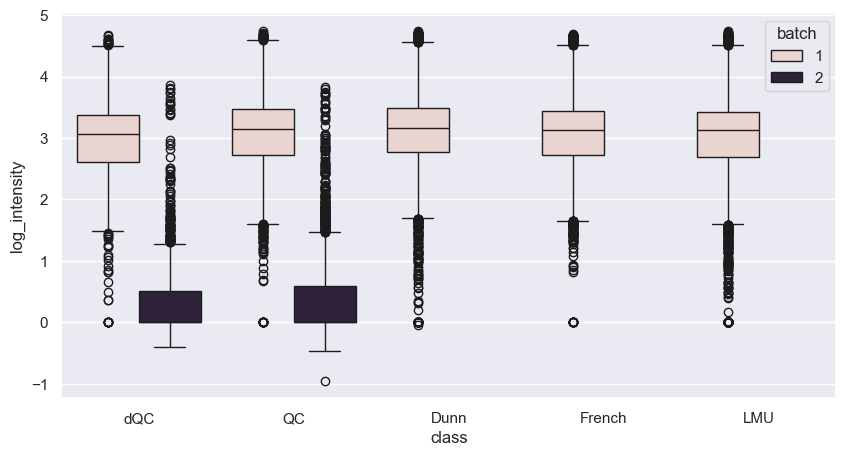

In [119]:
sns.set(rc = {'figure.figsize':(10, 5)})
sns.boxplot(df_data_melt, x='class', y='log_intensity', order=['dQC', 'QC', 'Dunn', 'French', 'LMU'], hue='batch')
fig.axes.set_title('Intensity distributions comparison between classes and batches',fontsize=20)
fig.set_xlabel("Classes",fontsize=20)
fig.set_ylabel("Intensity (log)",fontsize=20)
plt.savefig(os.path.join(OUTPUT_PATH, 'intensity_distribution_per_class.png'))

In [120]:
df_data_melt[['class', 'log_intensity']][df_data_melt['batch'] == 1].groupby('class').describe([.05,.1,.25,.5, .75, .9, .95])

log_intensity                                                    \
               count      mean       std       min        5%       10%   
class                                                                    
B             1512.0  0.013514  0.100509 -0.024660  0.000000  0.000000   
Dunn          6804.0  3.078164  0.687091 -0.047479  1.937385  2.141128   
French        6552.0  3.055246  0.660381  0.000000  1.870088  2.080169   
LMU           6552.0  3.003929  0.751363  0.000000  1.780158  2.035818   
QC            2772.0  3.062497  0.690682  0.000000  1.868731  2.086455   
SS             252.0  0.642774  1.285873  0.000000  0.000000  0.000000   
dQC           1260.0  2.951047  0.722779  0.000000  1.717884  1.915858   

                                                                    
             25%       50%       75%       90%       95%       max  
class                                                               
B       0.000000  0.000000  0.000000  0.000000  0.000000  0.968767  
Dunn    2.766551  3.158487  3.483267  3.833740  4.108142  4.733870  
French  2.725192  3.127594  3.441243  3.828129  4.056623  4.694323  
LMU     2.689933  3.125662  3.421558  3.779002  4.059750  4.736839  
QC      2.720270  3.152091  3.470705  3.821423  4.080374  4.744434  
SS      0.000000  0.000000  0.226060  3.308606  3.658640  4.695834  
dQC     2.617018  3.063548  3.372941  3.732662  3.959041  4.669472

Class-level intensity distributions are heavy-tailed distributions. We observe that intensities recorded in batch 2 for quality check samples are much lower than in batch 1, which encourages us to only consider batch 1 for QC / samples intensity comparison.

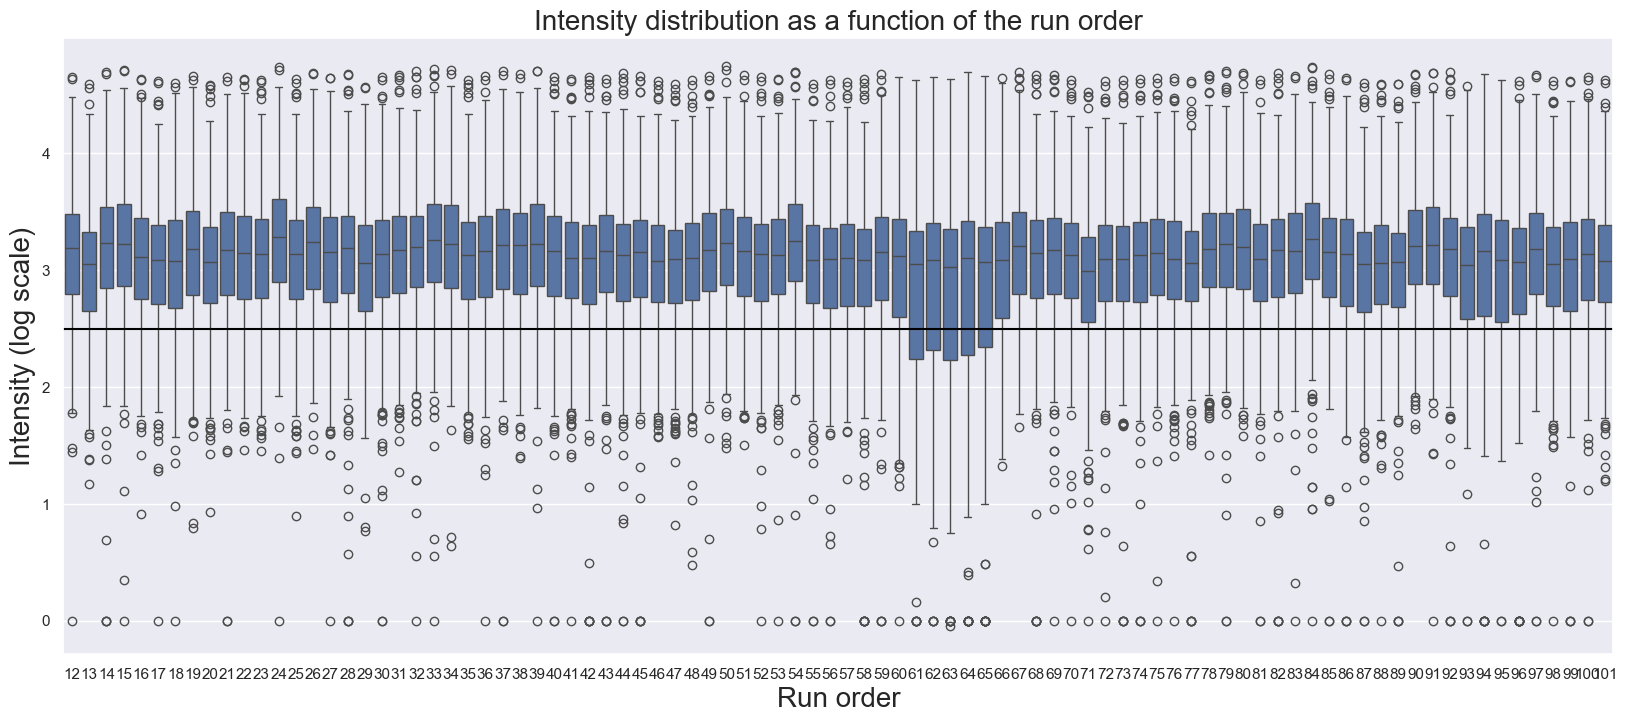

In [121]:
df_plot = df_data_melt[(df_data_melt['class'].isin(['QC', 'Dunn', 'LMU', 'French'])) & (df_data_melt['batch'] == 1)]
sns.set(rc = {'figure.figsize':(20, 8)})
fig = sns.boxplot(df_plot, x='order', y='log_intensity')#, hue='class')
fig.axhline(2.5, color='black')
fig.axes.set_title('Intensity distribution as a function of the run order',fontsize=20)
fig.set_xlabel("Run order",fontsize=20)
fig.set_ylabel("Intensity (log scale)",fontsize=20)
#fig.set_yscale('log')
plt.savefig(os.path.join(OUTPUT_PATH, 'intensity_distribution_runorder.png'))

From the above plot, we can notice an intensity distribution shift for run orders between 60 and 66. As it affected both quality checks and samples, we can assume it is due to technical variability and samples features intensity can be corrected with intensities of quality check on run 62. From inter quartile ranges of feature distribution, we can define an feature intensitx threshold at 500 to rule out features that are rarely seen. 

From previous works (1), (2), we can expect signal drifts in peak intensities as a function of the run order. These works suggest using QC metabolite intensities to correct for the technical drift. They also came up with spline or exponential curve fitting to QC data to derive correction coefficients. 

(1) [Evaluation and correction of injection order effects in LC-MS/MS based targeted metabolomics](https://www.sciencedirect.com/science/article/pii/S1570023222004184#s0010)

(2) [Instrumental Drift in Untargeted Metabolomics: Optimizing Data Quality with Intrastudy QC Samples](https://pmc.ncbi.nlm.nih.gov/articles/PMC10222478/)

(3)[Riquelme, G.; Zabalegui, N.; Marchi, P.; Jones, C.M.; Monge, M.E. A Python-Based Pipeline for Preprocessing LC–MS Data for Untargeted Metabolomics Workflows. Metabolites 2020, 10, 416, doi:10.3390/metabo10100416.](https://tidyms.readthedocs.io/en/latest/)

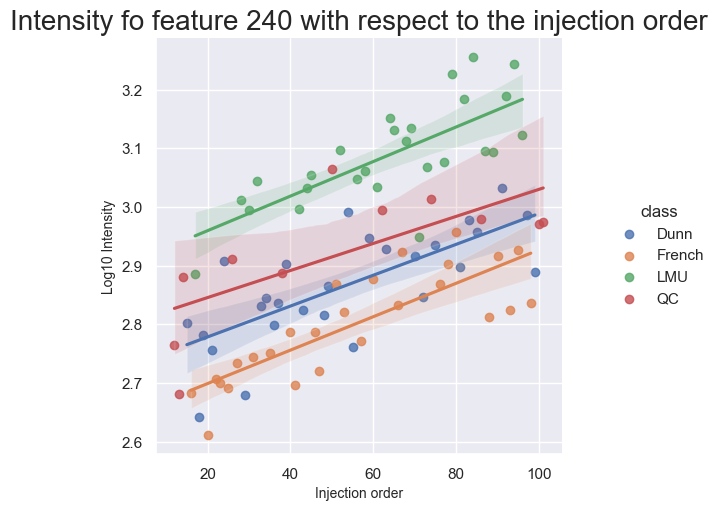

In [122]:
df_plot = df_data_melt[(df_data_melt['feature_number'] == 240) & (df_data_melt['class'].isin(['QC', 'Dunn', 'LMU', 'French'])) & (df_data_melt['batch'])]
sns.set(rc = {'figure.figsize':(10, 5)})
sns.lmplot(data=df_plot, x="order", y="log_intensity", hue="class")
plt.title('Intensity fo feature 240 with respect to the injection order',fontsize=20)
plt.xlabel("Injection order",fontsize=10)
plt.ylabel("Log10 Intensity",fontsize=10)
plt.savefig(os.path.join(OUTPUT_PATH, 'intensity_feature240_runorder.png'))
#fig.set_yscale('log')

This drift can easily be seen for feature 240 for instance. Indeed, we can guess there is a positive linear correlation between injection order and intensity. 
However, this linear relationship cannot be applied to all features.

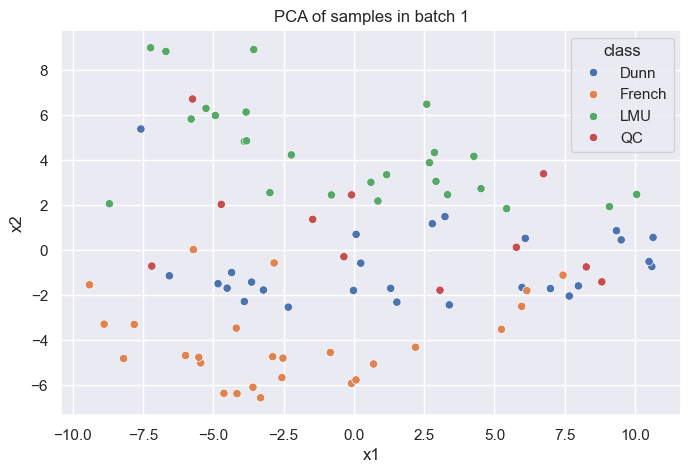

In [123]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
df_X = df_data[(df_data['batch'] == 1) & (df_data['class'].isin(['QC', 'Dunn', 'LMU', 'French']))].reset_index(drop=True)
X = df_X.drop(['class', 'sample', 'order', 'batch', 'sub_batch'], axis=1)\
        .map(lambda x : 0 if x < 1E3 else np.log10(x)).to_numpy()
X_new = pca_2d.fit_transform(X)

sns.set(rc = {'figure.figsize':(8, 5)})
df_plot = pd.DataFrame(X_new, columns=['x1', 'x2'])
df_plot['class'] = df_X['class']

fig = sns.scatterplot(df_plot, x='x1', y='x2', hue='class')#, style='sub_batch')
fig.set_title('PCA of samples in batch 1')
plt.savefig(os.path.join(OUTPUT_PATH, 'PCA_samples.png'))

Previous works suggest PCA dimensionality reduction to visualize how samples and quality checks cluster on the 2-main components graph. We observe that QC samples do not cluster tightly on the plot, indicating technical variation.

### 5.a - Difference between QC and samples for batch 1 

In terms of distribution, refer to 4.b. 
In terms of Coefficient of variation, see below

In [124]:
cv_classwise.groupby(['class']).describe()

CV%                                                              \
        count      mean       std       min       25%       50%       75%   
class                                                                       
Dunn    251.0  0.212712  0.147200  0.048848  0.151410  0.188174  0.225092   
French  252.0  0.171378  0.133541  0.057947  0.110646  0.138283  0.189349   
LMU     249.0  0.216501  0.167088  0.070364  0.159011  0.184929  0.214796   
QC      252.0  0.226127  0.169424  0.025969  0.141244  0.190521  0.257509   
dQC     251.0  0.230408  0.187722  0.007062  0.128175  0.208371  0.280337   

                  
             max  
class             
Dunn    1.482600  
French  1.369084  
LMU     1.482600  
QC      1.374284  
dQC     1.482600

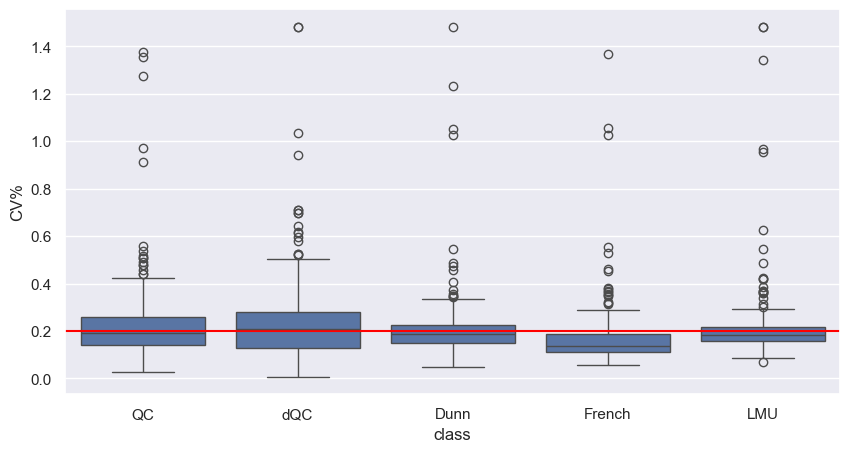

In [125]:
sns.set(rc = {'figure.figsize':(10, 5)})

fig = sns.boxplot(cv_classwise, x='class', y='CV%', order=['QC', 'dQC', 'Dunn', 'French', 'LMU'])
fig.axhline(0.20, color='red')

From the plot and the statistics, computing the coefficient of variation for features within the QC samples results in 50% of features having a CV lower than 20%, as required for reliable biomarker discovery. Features intensities measurements from diluted quality checks show higher coefficients of variations than non-diluted samples. 

### 5.b Computing the D-ratio

The D-ratio monitors how much of the total observed variation is due to technical variation. Preferred D-ratio for features are below 50%, with the metabolite intensity standard deviation across samples is much larger than the metabolite standard deviation for QC samples.
If the distribution of data is not Gaussian then, the raw data either needs to be mathematically transformed, e.g. log10, before calculating the D-ratio or a non-parametric alternative used, (1).

D-ratio is computed on batch 1 only.

(1)[Guidelines and considerations for the use of system suitability and quality control samples in mass spectrometry assays applied in untargeted clinical metabolomic studies](https://link.springer.com/article/10.1007/s11306-018-1367-3#Sec6)

In [126]:
sample_classes = ['Dunn', 'French', 'LMU']
qc_classes = ['QC']#, 'dQC']

QC_std = df_data_melt[df_data_melt['class'].isin(qc_classes) & (df_data_melt['batch'] == 1)]\
        .groupby(['feature']).agg({'intensity':lambda x : mad(x)})\
        .rename(columns={'intensity' : 'std_QC'})
general_std = df_data_melt[df_data_melt['class'].isin(sample_classes)]\
        .groupby(['feature']).agg({'intensity':lambda x : mad(x) })\
        .rename(columns={'intensity' : 'std_sample'})

d_ratio = general_std.reset_index().merge(QC_std.reset_index(), on='feature', how='outer')
d_ratio['D_ratio'] = d_ratio.apply(lambda x : 100 * x.std_QC / (np.sqrt(x.std_QC**2 + x.std_sample**2)), axis=1)

In [127]:
# Compute the biological standard deviation to the technical standard deviation per feature
d_ratio['std_ratio'] = d_ratio['std_sample'] / d_ratio['std_QC']

In [128]:
d_ratio[d_ratio['D_ratio'] <= 50].shape

(33, 5)

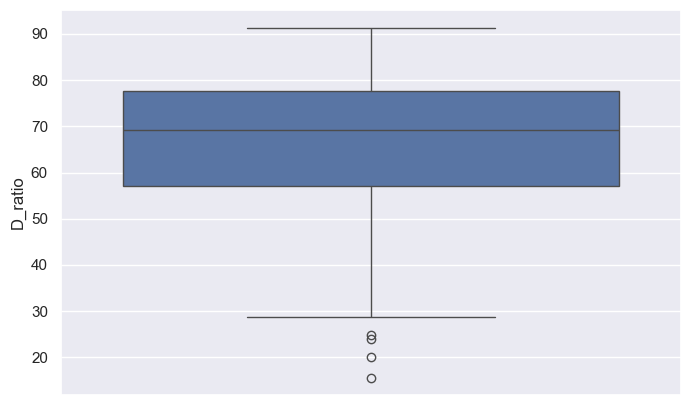

In [129]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.boxplot(d_ratio['D_ratio'])
plt.show()

D-ratio is below 50% for 33 features only, which shows that technical variance accounts for most of the observed variance. Variation in QC measurements should be taken into account to correct intensity measurements in samples of interest.